In [1]:
import cv2
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

# hi
Lijnen volgen nu (nog) de formule y = ax+b<br>
Voor het fitten van de lijn wordt nu (nog) least squares gebruikt<br>
Voor het evaluaren van de lijn wordt nu (nog) de Euclidean distance (of uhh eigenlijk de 'Euclidean distance' in de y-richting) gebruikt.<br>
Vond voorgeschreven code van internet vaag/onleesbaar, dus ik heb gewoon de Wikipediapagina van RANSAC gebruikt als richtlijn voor deze prachtig zelfgeschreven code, die jullie uiteraard ook superleesbaar vinden. Had het liefst natuurlijk gewoon mijn door Wouter (dis)approved Matlabcode neergezet.<br>

Will fix stuff later

In [2]:
np.random.seed(12345678)
x = np.random.random(10)
y = 1.6*x + np.random.random(10)
# A random 2 x N array with (x,y)-coordinates
# data[0] = x-axis data (independent variable, HORIZONTAL)
data = np.array([x, y])

Best model parameters: (1.9448642607472155, 0.26857823524544855)


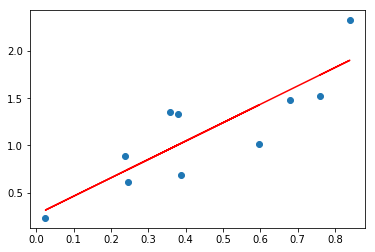

In [3]:
def ransac(data, max_iters=10, n_samples=5, thres=20, inlier_thres=40):
    # Number of data points in the set
    size = data.shape[1]
    
    best_fit = None
    smallest_error = np.inf
    
    for iteration in range(max_iters):
        # Drawing a random sample
        random_idx = np.random.randint(size, size=n_samples)
        random_sample = data[0:,random_idx]
        
        # Calculate a linear least-squares regression line
        slope, intercept, _, _, std_err = stats.linregress(random_sample[0], random_sample[1])

        # Calculate distance to line for each point
        line_y = slope * data[0] + intercept
        distances = line_y - data[1]
        distances = np.sqrt(distances**2)
        
        # Count number of inliers
        inliers_idx = np.where(distances <= thres)[0]
        n_inliers = len(inliers_idx)
        # Only consider the model (parameters) if we have enough inliers
        if n_inliers >= inlier_thres:
            random_sample = data[0:,inliers_idx]
            slope, intercept, r_value, p_value, std_err = stats.linregress(random_sample[0], random_sample[1])
            if best_fit is None or std_err < smallest_error:
                best_fit = (slope, intercept)
            
    return best_fit
    
# Apply RANSAC to the generated data
# Adjust the inlier threshold according to the size of the dataset
# Will probably turn the parameter itself into a ratio instead of a fixed number
result = ransac(data, inlier_thres=0.6*data.shape[1])
print("Best model parameters:", result)

if result is not None:
    a, b = result
    plt.plot(data[0], a*data[0]+b, 'r')
plt.plot(data[0], data[1], 'o')


In [4]:
# def fit_with_least_squares(X, y):
#     """
#     Fits model for a given data using least squares.
#     X should be an mxn matrix, where m is number of samples, and n is number of independent variables.
#     y should be an mx1 vector of dependent variables.
#     """
#     b = np.ones((X.shape[0], 1))
#     A = np.hstack((X, b))
#     theta = np.linalg.lstsq(A, y)[0]
#     return theta

# def evaluate_model(X, y, theta, inlier_threshold):
#     """
#     Evaluates model and returns total number of inliers.
#     X should be an mxn matrix, where m is number of samples, and n is number of independent variables.
#     y should be an mx1 vector of dependent variables.
#     theta should be an (n+1)x1 vector of model parameters.
#     inlier_threshold should be a scalar.
#     """
#     b = np.ones((X.shape[0], 1))
#     y = y.reshape((y.shape[0], 1))
#     A = np.hstack((y, X, b))
#     theta = np.insert(theta, 0, -1.)
    
#     distances = np.abs(np.sum(A*theta, axis=1)) / np.sqrt(np.sum(np.power(theta[:-1], 2)))
#     inliers = distances <= inlier_threshold
#     num_inliers = np.count_nonzero(inliers == True)
    
#     return num_inliers